In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from RNN_model import SimpleRNN
import utils_2 as ut2
from traindata import trainData



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data_utils


np.random.seed(seed=77)
torch.manual_seed(77)

c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Amplitude')
train, val, test = data.split_data('Amplitude')

In [3]:
x_train, y_train = ut2.create_sequences(train[:30000], 1000, 1)
x_val, y_val = ut2.create_sequences(val[:10000], 1000, 1)
x_test, y_test = ut2.create_sequences(test[:10000], 1000, 1)


In [4]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((29000, 1000), (29000,), (9000, 1000), (9000,), (9000, 1000), (9000,))

In [5]:
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
x_val = torch.from_numpy(x_val.astype(np.float32))
y_val = torch.from_numpy(y_val.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [6]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

(torch.Size([29000, 1000]),
 torch.Size([29000]),
 torch.Size([9000, 1000]),
 torch.Size([9000]),
 torch.Size([9000, 1000]),
 torch.Size([9000]))

In [7]:
def rolling_window(data, window_size):
    # Reshape the data into overlapping sequences of window_size
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i+window_size])
    return np.array(windows)

## **Single Step**

In [9]:
in_size = x_train.shape[-1]
out_size = 1
hid_size = 3
num_layers = 1


model = SimpleRNN(in_size, hid_size, out_size, num_layers)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

 40%|████      | 4/10 [00:56<01:23, 13.98s/it]

Early stopping at epoch:  3


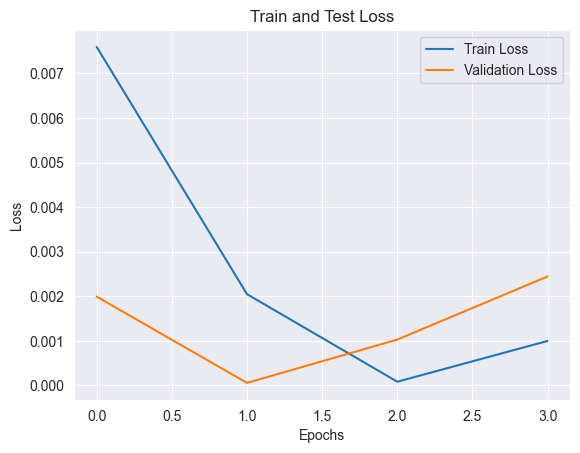

 50%|█████     | 5/10 [01:10<01:10, 14.05s/it]

Epoch :0.5    Train Loss :0.0023718690499663353    Test Loss :0.0025769921485334635
Early stopping at epoch:  4


 60%|██████    | 6/10 [01:24<00:56, 14.01s/it]

Early stopping at epoch:  5


 70%|███████   | 7/10 [01:38<00:41, 13.99s/it]

Early stopping at epoch:  6


 80%|████████  | 8/10 [01:52<00:27, 13.96s/it]

Early stopping at epoch:  7


 90%|█████████ | 9/10 [02:06<00:13, 13.97s/it]

Early stopping at epoch:  8


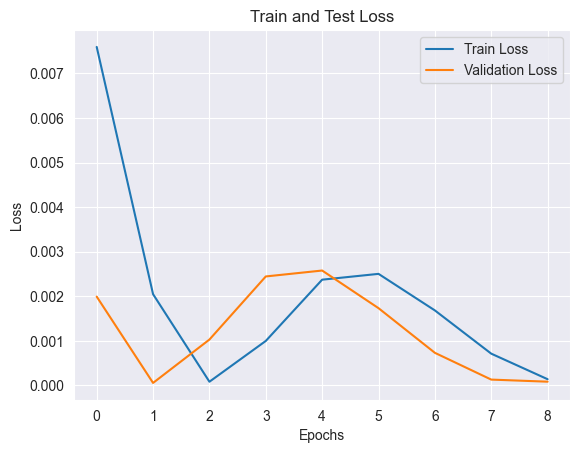

100%|██████████| 10/10 [02:20<00:00, 14.03s/it]

Epoch :1.0    Train Loss :0.00010916167229879647    Test Loss :0.00041045265970751643
Early stopping at epoch:  9


In [10]:
train_loss, test_loss = ut2.simpleTrain_model(model,
                                            criterion,
                                            optimizer,
                                            x_train,
                                            x_val,
                                            y_train,
                                            y_val,
                                            epochs=10)

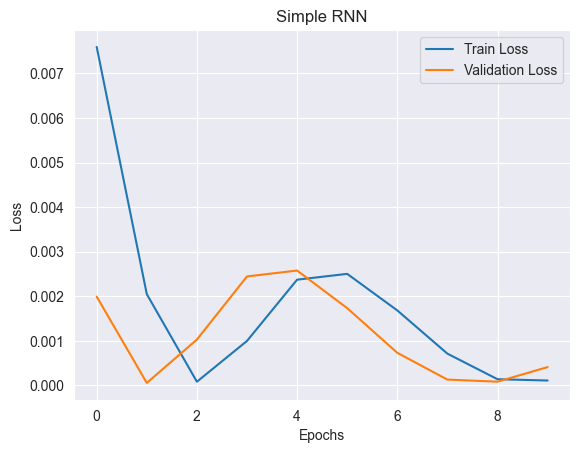

In [11]:
ut2.plot_loss(train_loss, test_loss, 'Simple RNN')

### **test prediction with rolling window**

In [12]:
test_pred = ut2.rollingWindowPrediction(model, x_test, steps = 50)

100%|██████████| 9000/9000 [01:05<00:00, 137.30it/s]


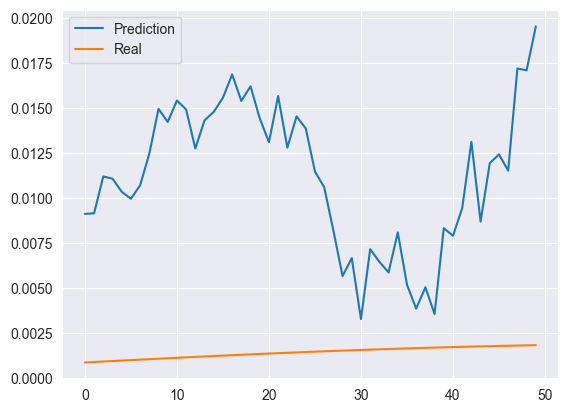

In [13]:
plt.plot(test_pred[-1], label='Prediction')
plt.plot(y_test[-50:].numpy(), label='Real')
plt.legend()
plt.show()

### **best model re-training**

In [15]:
np.argmin(test_loss), np.min(test_loss)

(1, 5.525937376660295e-05)

In [14]:
# 
utils.resume(model, optimizer, 'earlystop_1.pth' )